In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format
plt.style.use('seaborn-whitegrid')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
with pd.HDFStore('data.mar') as store:
    mardf = store['mar']

    
with pd.HDFStore('data1.h5') as store:
    seandf = store['nevers']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7902623370>]],
      dtype=object)

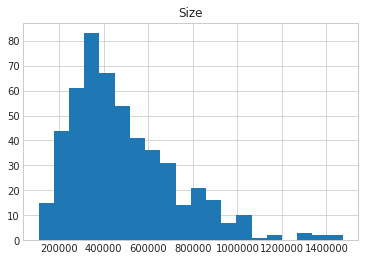

In [3]:
import os
imgs = pd.DataFrame({'Image': seandf['Image'].unique()})
imgs['Size'] = imgs['Image'].apply(lambda x: os.path.getsize('../gotest/images/' + x))
imgs.hist(bins=20)

In [4]:
seandf = seandf.drop('Image', axis=1) 
seandf['Start_time'] = pd.to_datetime(seandf['Start_ns'])

mardf = mardf.drop('Img', axis=1)
mardf['Start_ns'] = mardf['Start_ns']*10**9
mardf = mardf.rename(columns={'Servertime1':'ServerTime1', 'Servertime2':'ServerTime2', 'Servertime3':'ServerTime3'})
mardf['Start_time'] = pd.to_datetime(mardf['Start_ns'])

In [5]:
# with pd.HDFStore('data.h5') as store:
    # df = store['data'] 
#  df = seandf.append(mardf, sort=True)
def reshaperaw(df):
    l, s = [], set()
    for u in df['ServerUUID']:
        if u in s:
            l.append('warm')
        else:
            l.append('cold')
            s.add(u)
    df.loc[:, 'Heat'] = l
    df = df[df['Server'] != 'nevers']
    df.loc[:, 'Server'] = df['Server'].apply(lambda s: s[:-5])
    df.loc[:, 'Start_time'] = pd.to_datetime(df['Start_ns'])
    df.loc[:, 'Start_hour'] = df.loc[:, 'Start_time'].astype('datetime64[h]')
    df.loc[:, 'Server_ns'] = df['Time_ns'] - df.loc[:,'ServerTime1':'ServerTime3'].sum(axis=1)
    df.loc[:, 'concurrent'] = df['Worker'].apply(lambda w: 'single' if w == 0 else 'multi')
    df = df.set_index('Start_ns')
    df = df.sort_index()
    # df = df.set_index(['Server', 'concurrent', 'Start_hour', 'Start_ns'])
    return df

df = reshaperaw(seandf)

/home/arccy/LSproject/uva-ls/tools/analysis/env/lib/python3.8/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/arccy/LSproject/uva-ls/tools/analysis/env/lib/python3.8/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


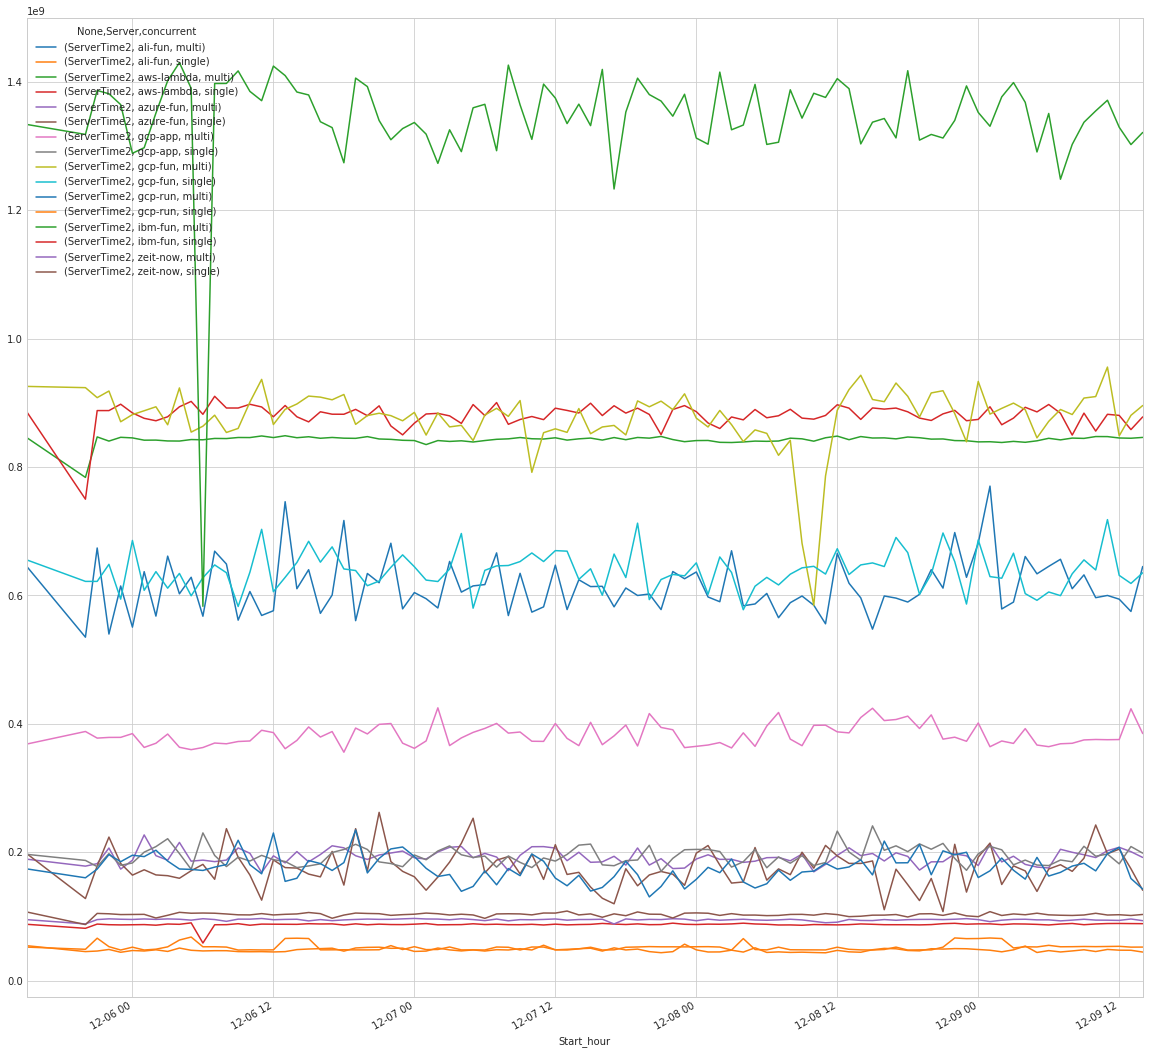

In [6]:
def plotovertime(split, y):  
    df.groupby(['Server', 'Start_hour'] + split).mean()[y].reset_index().pivot_table(index='Start_hour', columns=['Server']+ split).plot(figsize=(20, 20))
plotovertime(['concurrent'], 'ServerTime2')

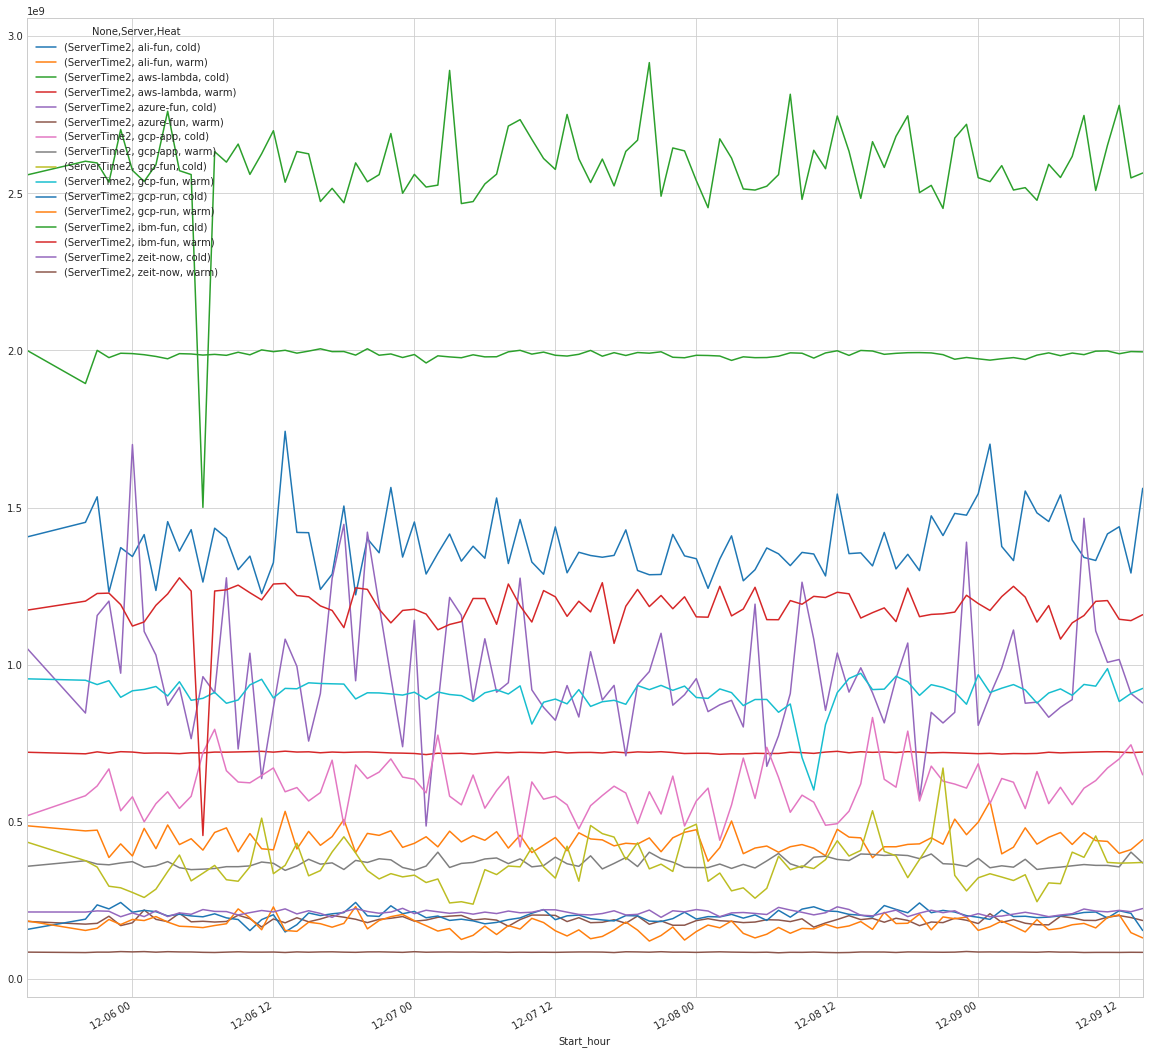

In [7]:
plotovertime(['Heat'], 'ServerTime2')